In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost

from functions import make_dataset

from functions import make_portfolio

from sklearn.utils import shuffle

import time

import pickle

In [2]:
import pyautogui

In [2]:
start = time.perf_counter()
features2 = pd.read_pickle("training_sets/features2")
print(time.perf_counter() - start)

2.031272099999999


In [2]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [3]:
Dates = np.append(Date1, np.append(Date2, Date3))

In [275]:
def make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, pred_col, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train, Y_return_40

In [273]:
def return_40_metric(pred, labels):


    return np.mean(labels[np.argsort(pred)[:500]]), (1-np.sort(pred)[499]), np.mean(labels[np.argsort(pred)[:100]]), (1-np.sort(pred)[99]), np.mean(labels[np.argsort(pred)[:20]]), (1-np.sort(pred)[19])

In [274]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):
            

        predictions_eval = model.predict(self.eval_mine)

        self.results_eval_mine.append(return_40_metric(model.predict(self.eval_mine), self.eval_return_40))    
        
                 
            
        return False

In [269]:
params1 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [9]:
with open("ColSearch/cols_metrics_binary.pkl", "rb") as f:
    metrics_binary = pickle.load(f)

In [10]:
with open("ColSearch/cols_return_20_binary.pkl", "rb") as f:
    return_20_binary = pickle.load(f)

In [11]:
with open("ColSearch/cols_return_500_binary.pkl", "rb") as f:
    return_500_binary = pickle.load(f)

In [12]:
columns_to_choose_from = np.unique(np.array([metrics_binary[:30], return_20_binary[:30], return_500_binary[:30]]))

In [270]:
prediction_dates = np.linspace(650, len(Dates) - 80, 20).astype(int)

In [15]:
with open("ColSearch2/results_binary.pkl", "rb") as f:
    results = pickle.load(f)

In [16]:
len(results)

9

In [271]:
unique_cols

array(['ABAND_indicator_160', 'ABAND_signal_160', 'ADX_4_23', 'APO_10_20',
       'APO_10_40', 'ATR_160', 'BOL_indicator_10', 'CMO_10',
       'Cash & Cash Equivalents',
       'Cash & Cash Equivalents/Total Liabilities_QC',
       'Cash & Cash Equivalents_YC',
       'Cash from (Repayment of) Debt/Total Liabilities',
       'Cash from (Repayment of) Debt/Total Liabilities_QC', 'Close',
       'DEMA_20', 'Enterprise Value', 'MFI_160', 'Market-Cap',
       'Net Cash from Operating Activities/Cash & Cash Equivalents_YC',
       'Net Income', 'Net Income/Enterprise Value', 'Net Profit Margin',
       'Net Profit Margin_YC', 'OBV_40',
       'Payables & Accruals/Cost of Revenue_QC',
       'Price to Earnings Ratio (quarterly)',
       'Price to Earnings Ratio (quarterly)_YC',
       'Price to Sales Ratio (quarterly)',
       'Price to Sales Ratio (quarterly)_QC',
       'Property, Plant & Equipment, Net', 'RSI_28', 'RSI_7',
       'Retained Earnings/Total Liabilities',
       'Retained Ear

In [272]:
params3 = {
  'colsample_bynode': 0.4,
    'colsample_bytree' : 0.4,
    'colsample_bylevel' : 0.3,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [279]:
X_train_master

ABAND_indicator_160  ABAND_signal_160   ADX_4_23  \
Date       Ticker                                                     
2013-05-15 A                  1.228663               1.0  31.227815   
           AAL                1.808426               1.0  44.685737   
           AAMC                    NaN               0.0  78.486115   
           AAON               2.541011               1.0  63.675136   
           AAP                1.372023               1.0  43.245738   
...                                ...               ...        ...   
2014-05-27 ZIOP              -0.467863              -1.0  55.423866   
           ZNGA              -0.770121              -1.0  64.404891   
           ZTS               -0.077525               0.0  59.134975   
           ZUMZ               0.490053               1.0  64.219281   
           ZVO               -1.249725              -1.0  41.319797   

                   APO_10_20  APO_10_40    ATR_160  BOL_indicator_10  \
Date       Ticker                                                      
2013-05-15 A        0.012445   0.019094   0.556172          0.455366   
           AAL      0.028169   0.064040  36.424432          0.485370   
           AAMC     0.139961   0.334195        NaN          0.285151   
           AAON     0.023334   0.058205  19.933934          0.291560   
           AAP      0.013097   0.032677  -2.283879          0.512806   
...                      ...        ...        ...               ...   
2014-05-27 ZIOP    -0.020369  -0.082617  41.618818          0.355434   
           ZNGA    -0.045643  -0.115039  28.997807         -0.033393   
           ZTS      0.004146   0.010750  -2.976395          0.322463   
           ZUMZ     0.022454   0.055110  -7.035231          0.127338   
           ZVO     -0.021549  -0.048905  27.830871         -0.571639   

                      CMO_10  Cash & Cash Equivalents  \
Date       Ticker                                       
2013-05-15 A       78.738739             2.450000e+09   
           AAL     93.248945             4.800000e+08   
           AAMC    79.117383             2.589400e+07   
           AAON    70.370370             9.717000e+06   
           AAP     43.829787             5.981110e+08   
...                      ...                      ...   
2014-05-27 ZIOP    -2.000000             6.038500e+07   
           ZNGA   -18.750000             1.224530e+08   
           ZTS     -7.801418             5.060000e+08   
           ZUMZ   -15.742129             1.466100e+07   
           ZVO    -40.000000             2.125260e+08   

                   Cash & Cash Equivalents/Total Liabilities_QC  ...  \
Date       Ticker                                                ...   
2013-05-15 A                                           0.022733  ...   
           AAL                                        -0.000989  ...   
           AAMC                                             NaN  ...   
           AAON                                        0.139408  ...   
           AAP                                         0.026401  ...   
...                                                         ...  ...   
2014-05-27 ZIOP                                       -0.252260  ...   
           ZNGA                                       -0.883395  ...   
           ZTS                                        -0.013607  ...   
           ZUMZ                                       -0.039678  ...   
           ZVO                                        -0.843558  ...   

                   volatility_160  volatility_240  volatility_320  \
Date       Ticker                                                   
2013-05-15 A             1.528887        1.709644        1.707080   
           AAL           2.343384        2.901444        3.189619   
           AAMC               NaN             NaN             NaN   
           AAON          1.527344        1.764839        1.873006   
           AAP           1.693351        1.668539        1.925100

In [285]:
cols1 = unique_cols.copy()

In [289]:
count = 0
results = []
start_time = time.perf_counter()

#while True:
    
while count ==0:
    
    count +=1
    
    """
    
    if time.perf_counter() - start_time > 3600:
        print("sleeping")
        time.sleep(600)
        start_time = time.perf_counter()
        
    count+=1
    print(str(count))

    
    cols_trials = []
    for i in range(10):
        cols_trials.append(np.random.choice(columns_to_choose_from, np.random.randint(6, 30), replace = False))
        
        
    unique_cols = np.array([])
    for i in cols_trials:
        unique_cols = np.append(unique_cols, i)

    unique_cols = np.unique(unique_cols)
    
    unique_cols = np.append(unique_cols, ["Class_binary_40_20", "return_40"])
    
    """
    
    results1 = []
    
    
    cols_trials = [cols1]
    unique_cols = np.append(cols1, ["Class_binary_40_20", "return_40"])
    
    
    for prediction_date in prediction_dates:
        
        
        results2 = []
        
        start_time_df_create = time.perf_counter()
        
        
        training_period = Dates[prediction_date - 200 - 40 + 1: prediction_date - 40 +1]

        prediction_period = Dates[prediction_date :prediction_date + 20 + 1]
        
         
        if len(np.intersect1d(np.append(training_period, prediction_period), Date1)):
        
            if "features1" not in locals():

                features1 = pd.read_pickle("training_sets/features1")   
                
                print("imported features1")

            Date1_intersect = np.intersect1d(np.append(training_period, prediction_period), Date1)

            X_train_master = features1.loc[Date1_intersect, unique_cols]
            

        else:

            if "features1" in locals():
                del features1
                
                print("deleted features1")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date2)):
            
            if "features2" not in locals():

                features2 = pd.read_pickle("training_sets/features2")
                
                print("imported features2")
                
            Date2_intersect = np.intersect1d(np.append(training_period, prediction_period), Date2)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features2.loc[Date2_intersect, unique_cols])
                
            else:
                
                X_train_master = features2.loc[Date2_intersect, unique_cols]
                
        else:

            if "features2" in locals():
                del features2
                
                print("deleted features2")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date3)):

            if "features3" not in locals():

                features3 = pd.read_pickle("training_sets/features3")
                
                print("imported features3")
                
                
            Date3_intersect = np.intersect1d(np.append(training_period, prediction_period), Date3)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features3.loc[Date3_intersect, unique_cols])
                
            else:
                
                X_train_master = features3.loc[Date3_intersect, unique_cols]

        else:

            if "features3" in locals():
                del features3
                
                print("deleted features3")
                
                
        print("df_create_time: "+ str(time.perf_counter() - start_time_df_create))
        
        start_time_cols = time.perf_counter()
        
        for col_indx, cols in enumerate(cols_trials):

        
            results3 = []

            X_train, X_test, Y_train, Y_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods(X_train_master, training_period, prediction_period, cols, "Class_binary_40_20", "return_40")

            train_weights = Y_train.map({0:19, 1:1})

            xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)

            xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)

            data = []

            mycallback = my_callback(xgtest, Y_return_40, data)

            bst = xgboost.train(params3, xgtrain, num_boost_round = 200, verbose_eval = False, callbacks = [mycallback])
            
            
            results3.append(str(count) + str(col_indx))
            results3.append(prediction_date)
            results3.append(cols)
            results3.append(data)
            results3.append(bst.get_score(importance_type='weight'))
            results3.append(bst.get_score(importance_type='gain'))
            results3.append(bst.get_score(importance_type='cover'))

            results2.append(results3)
            
        results1.append(results2)
        
        print("10 cols time: " + str(time.perf_counter() - start_time_cols))
            
            
        del X_train_master
        
    results.append(results1)
    
    #with open("ColSearch2/results_binary3.pkl", "wb") as f:
    #    pickle.dump(results, f)
        
    
    
    
    
    
    

imported features1
deleted features2
df_create_time: 4.191953999999896
10 cols time: 57.01198859999931
df_create_time: 0.35568749999947613
10 cols time: 59.83512259999952
imported features2
df_create_time: 8.170820800000001
10 cols time: 60.501103200000216
df_create_time: 0.6012711000003037
10 cols time: 60.04097460000048
df_create_time: 0.5354642999991484
10 cols time: 60.847629900001266
deleted features1
df_create_time: 0.6978345999996236
10 cols time: 62.456179200000406
df_create_time: 0.42362599999978556
10 cols time: 65.5266044
df_create_time: 0.4350312999995367
10 cols time: 65.97579299999961
df_create_time: 0.41771719999997003
10 cols time: 65.49287999999979
df_create_time: 0.43149669999911566
10 cols time: 65.41090509999958
df_create_time: 0.42899510000097507
10 cols time: 66.82737840000118
imported features3
df_create_time: 9.47814550000112
10 cols time: 66.11070889999974
df_create_time: 0.6488363000007666
10 cols time: 73.17975800000022
df_create_time: 0.5831355999998777
10 c

In [278]:
Y_train

,,Class_binary_40_20,Class_binary_40_20,Class_binary_40_20,Class_binary_40_20
Date,Ticker,,,,
2013-07-02,ARWR,0.0,0.0,0.0,0.0
2013-05-30,CTS,1.0,1.0,1.0,1.0
2013-07-12,SAFM,1.0,1.0,1.0,1.0
2013-12-05,ITW,1.0,1.0,1.0,1.0
2013-09-05,FTK,1.0,1.0,1.0,1.0
...,...,...,...,...,...
2013-08-23,ADUS,0.0,0.0,0.0,0.0
2014-01-29,JOE,1.0,1.0,1.0,1.0
2014-01-23,BG,1.0,1.0,1.0,1.0


In [5]:
def make_dataset_eval_with_extra_return_40_term_from_periods_for_regression(df, training_period, prediction_period, cols, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, return_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train_return_40 = X_train.pop(return_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train_return_40, Y_test_return_40

In [6]:
def return_40_metric_for_regression(pred, labels):


    return np.mean(labels[np.argsort(pred)[-500:]]), np.sort(pred)[-500], np.mean(labels[np.argsort(pred)[-100:]]), np.sort(pred)[-100], np.mean(labels[np.argsort(pred)[-20:]]), np.sort(pred)[-20]

In [7]:
class my_callback_regression(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):
            

        predictions_eval = model.predict(self.eval_mine)

        self.results_eval_mine.append(return_40_metric_for_regression(model.predict(self.eval_mine), self.eval_return_40))    
        
                   
        return False

In [8]:
params2 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'reg:squarederror',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [9]:
with open("ColSearch/cols_metrics_reg.pkl", "rb") as f:
    metrics_reg = pickle.load(f)

In [10]:
with open("ColSearch/cols_return_20_reg.pkl", "rb") as f:
    return_20_reg = pickle.load(f)

In [11]:
with open("ColSearch/cols_return_500_reg.pkl", "rb") as f:
    return_500_reg = pickle.load(f)

In [12]:
columns_to_choose_from = np.unique(np.array([metrics_reg[:30], return_20_reg[:30], return_500_reg[:30]]))

In [5]:
prediction_dates = np.linspace(650, len(Dates) - 80, 20).astype(int)

In [13]:
with open("ColSearch2/results_reg.pkl", "rb") as f:
    results = pickle.load(f)

In [14]:
count = 0
results = []
start_time = time.perf_counter()

while True:
    
    if time.perf_counter() - start_time > 150:
        for i in range(0, 3):
            pyautogui.press('shift')
        print("sleeping")
        time.sleep(600)
        start_time = time.perf_counter()
        
    count+=1
    print(str(count))

    
    cols_trials = []
    for i in range(10):
        cols_trials.append(np.random.choice(columns_to_choose_from, np.random.randint(6, 30), replace = False))
        
        
    unique_cols = np.array([])
    for i in cols_trials:
        unique_cols = np.append(unique_cols, i)

    unique_cols = np.unique(unique_cols)
    
    unique_cols = np.append(unique_cols, ["return_40"])
    
    results1 = []
    
    
    for prediction_date in prediction_dates:
        
        
        results2 = []
        
        start_time_df_create = time.perf_counter()
        
        
        training_period = Dates[prediction_date - 200 - 40 + 1: prediction_date - 40 +1]

        prediction_period = Dates[prediction_date :prediction_date + 20 + 1]
        
         
        if len(np.intersect1d(np.append(training_period, prediction_period), Date1)):
        
            if "features1" not in locals():

                features1 = pd.read_pickle("training_sets/features1")   
                
                print("imported features1")

            Date1_intersect = np.intersect1d(np.append(training_period, prediction_period), Date1)

            X_train_master = features1.loc[Date1_intersect, unique_cols]
            

        else:

            if "features1" in locals():
                del features1
                
                print("deleted features1")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date2)):
            
            if "features2" not in locals():

                features2 = pd.read_pickle("training_sets/features2")
                
                print("imported features2")
                
            Date2_intersect = np.intersect1d(np.append(training_period, prediction_period), Date2)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features2.loc[Date2_intersect, unique_cols])
                
            else:
                
                X_train_master = features2.loc[Date2_intersect, unique_cols]
                
        else:

            if "features2" in locals():
                del features2
                
                print("deleted features2")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date3)):

            if "features3" not in locals():

                features3 = pd.read_pickle("training_sets/features3")
                
                print("imported features3")
                
                
            Date3_intersect = np.intersect1d(np.append(training_period, prediction_period), Date3)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features3.loc[Date3_intersect, unique_cols])
                
            else:
                
                X_train_master = features3.loc[Date3_intersect, unique_cols]

        else:

            if "features3" in locals():
                del features3
                
                print("deleted features3")
                
                
        print("df_create_time: "+ str(time.perf_counter() - start_time_df_create))
        
        start_time_cols = time.perf_counter()
        
        for col_indx, cols in enumerate(cols_trials):

        
            results3 = []
            
            X_train, X_test, Y_train_return_40, Y_test_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods_for_regression(X_train_master, training_period, prediction_period, cols, "return_40")

            xgtrain = xgboost.DMatrix(X_train.values, Y_train_return_40.values, feature_names = cols)

            xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)

            data = []

            mycallback = my_callback_regression(xgtest, Y_test_return_40, data)

            bst = xgboost.train(params2, xgtrain, num_boost_round = 60, verbose_eval = False, callbacks = [mycallback])
            
            
            results3.append(str(count) + str(col_indx))
            results3.append(prediction_date)
            results3.append(cols)
            results3.append(data)
            results3.append(bst.get_score(importance_type='weight'))
            results3.append(bst.get_score(importance_type='gain'))
            results3.append(bst.get_score(importance_type='cover'))

            results2.append(results3)
            
        results1.append(results2)
        
        print("10 cols time: " + str(time.perf_counter() - start_time_cols))
            
            
        del X_train_master
        
    results.append(results1)
    
    with open("ColSearch2/results_reg2.pkl", "wb") as f:
        pickle.dump(results, f)
        
    if count == 19:
        break

1
imported features1
df_create_time: 2.9115467999999964
10 cols time: 136.405638
df_create_time: 0.3300265999999965
10 cols time: 136.06916040000002
imported features2
df_create_time: 6.336841500000048
10 cols time: 139.35066389999997
df_create_time: 0.4534290999999939
10 cols time: 145.77292209999996
df_create_time: 0.5057696000000078
10 cols time: 150.70243719999996
deleted features1
df_create_time: 0.7247283999998899
10 cols time: 148.08797270000002
df_create_time: 0.3785676999999623
10 cols time: 148.89614440000003
df_create_time: 0.3887677000000167
10 cols time: 151.6911338
df_create_time: 0.3882082000000082
10 cols time: 148.65818560000002
df_create_time: 0.38405779999993683
10 cols time: 151.64175809999983
df_create_time: 0.40890680000006796
10 cols time: 149.79889660000003
imported features3
df_create_time: 10.775800199999821
10 cols time: 148.70571629999995
df_create_time: 0.7477035000001706
10 cols time: 145.7109114
df_create_time: 0.5923703000000842
10 cols time: 147.8329673

In [4]:
sp500 = pd.read_pickle("External_data/sp500")

In [6]:
Dates_formatted = [Dates[prediction_dates[i]] for i in range(len(prediction_dates))] 

In [77]:
sp500_return = [sp500.loc[Dates_formatted[i]]["return_40"] for i in range(len(Dates_formatted))]

In [94]:
with open("ColSearch2/results_binary.pkl", "rb") as f:
    results = pickle.load(f)

In [95]:
with open("ColSearch2/results_reg2.pkl", "rb") as f:
    results_reg = pickle.load(f)

In [105]:
dataset = results_reg.copy()


In [106]:
len(dataset)

19

In [107]:
results_parsed = []
for i in range(len(dataset)):
    for pred_date in range(len(prediction_dates)):
        for col_indx in range(10):
            results_parsed.append(dataset[i][pred_date][col_indx])


In [108]:
len(results_parsed)

3800

In [109]:
results_parsed_2 = []
for i in range(19):
    for col_indx in range(10):
        results_parsed_2.append(results_parsed[i * 200:(i+1)*200][col_indx::10])

In [56]:
len(results_parsed_2)

190

In [104]:
with open("ColSearch2/results_binary_parsed.pkl", "wb") as f:
    pickle.dump(results_parsed_2, f)

In [110]:
with open("ColSearch2/results_reg2_parsed.pkl", "wb") as f:
    pickle.dump(results_parsed_2, f)

In [111]:
results_reg = results_parsed_2.copy()

In [112]:
with open("ColSearch2/results_binary_parsed.pkl", "rb") as f:
    results_binary = pickle.load(f)

In [136]:
all_returns_binary = np.array([])
all_returns_reg = np.array([])
portfolio_indx = 0

for i in range(len(results_binary)):
    
    for j in range(20):
        
        #if j != 8:
        
        all_returns_binary = np.append(all_returns_binary, np.array(results_binary[i][j][3])[:,portfolio_indx])
        all_returns_reg = np.append(all_returns_reg, np.array(results_reg[i][j][3])[:,portfolio_indx])
    

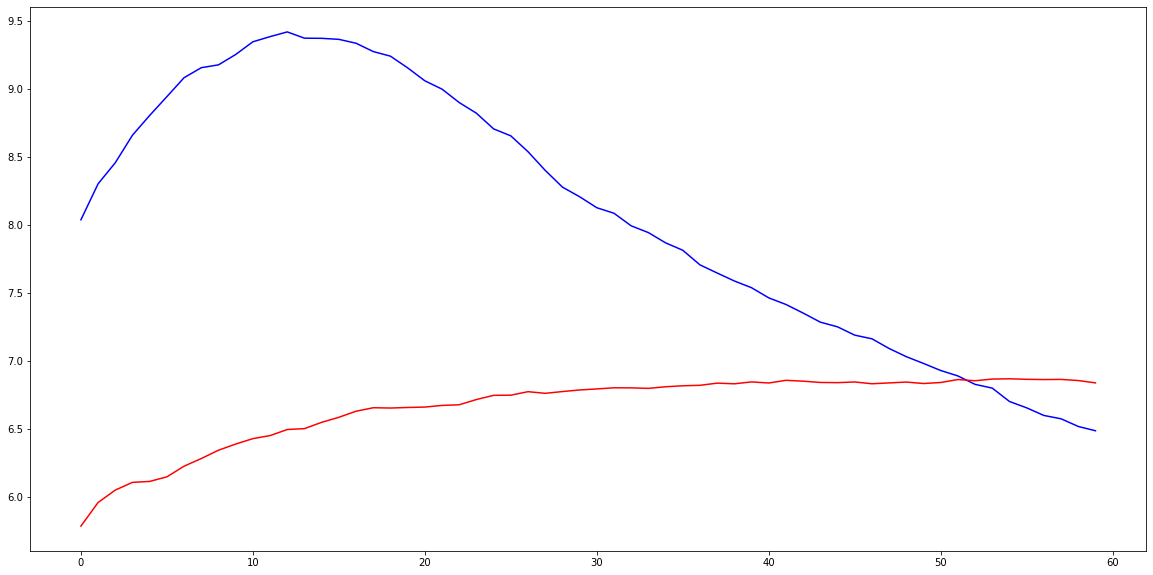

In [137]:
plt.figure(figsize = (20, 10))

plt.plot(np.mean(np.reshape(all_returns_binary, (-1, 60)), axis = 0), "blue")
plt.plot(np.mean(np.reshape(all_returns_reg, (-1, 60)), axis = 0), "red")




In [ ]:
"""
take the mean of the 40 - 50 boosting round portfolio

"""

In [ ]:
all_returns_binary = np.array([])
all_returns_reg = np.array([])
portfolio_indx = 4

for i in range(len(results_binary)):
    
    for j in range(20):
        
        #if j != 8:
        
        all_returns_binary = np.append(all_returns_binary, np.array(results_binary[i][j][3])[:,portfolio_indx])
        all_returns_reg = np.append(all_returns_reg, np.array(results_reg[i][j][3])[:,portfolio_indx])

In [152]:
all_returns_binary = np.array([])
all_returns_reg = np.array([])
portfolio_indx = 0
for i in range(len(results_binary)):
    
    for j in range(20):
        
        #if j ==8:
         #   continue
        
        all_returns_binary = np.append(all_returns_binary, np.mean(np.array(results_binary[i][j][3])[50:,portfolio_indx]))
        all_returns_reg = np.append(all_returns_reg, np.mean(np.array(results_reg[i][j][3])[50:,portfolio_indx]))
        
all_returns_binary = np.reshape(all_returns_binary, (-1, 20))
all_returns_reg = np.reshape(all_returns_reg, (-1, 20))     

In [ ]:
plt.figure(figsize = (20, 10))
#plt.plot([np.mean(np.reshape(np.mean(np.array(all_returns_binary_500)[:,10:20], axis = 1), (-1, 10))[i::20]) for i in range(20)], "b")
#plt.plot([np.mean(np.reshape(np.mean(np.array(all_returns_reg_500)[:,40:50], axis = 1), (-1, 10))[i::20]) for i in range(20)], "r")


plt.plot(np.mean(all_returns_binary, axis = 0), "b")
plt.plot(np.mean(all_returns_reg, axis = 0), "red")
plt.plot(sp500_return, "black")
#plt.plot(np.append(sp500_return[:8], sp500_return[9:]), "black")

In [154]:
np.corrcoef(np.mean(all_returns_binary, axis = 0), sp500_return)[0][1], np.corrcoef(np.mean(all_returns_reg, axis = 0), sp500_return)[0][1]

(0.48107358804928463, 0.38449688504579094)

In [ ]:
"""
want to see return vs threshold
"""

In [175]:
all_returns_binary = np.array([])
all_returns_reg = np.array([])
all_returns_binary_thresh = np.array([])
all_returns_reg_thresh = np.array([])

portfolio_indx = 4
boosting_round_start = 50

for i in range(len(results_binary)):
    
    for j in range(20):
        
        if j ==8:
            continue
        
        all_returns_binary = np.append(all_returns_binary, np.array(results_binary[i][j][3])[boosting_round_start:,4])
        all_returns_reg = np.append(all_returns_reg, np.array(results_reg[i][j][3])[boosting_round_start:,4])
        
        all_returns_binary_thresh = np.append(all_returns_binary_thresh, np.array(results_binary[i][j][3])[boosting_round_start:,(portfolio_indx + 1)])
        all_returns_reg_thresh = np.append(all_returns_reg_thresh, np.array(results_reg[i][j][3])[boosting_round_start:,(portfolio_indx + 1)])
        
        
        
        

In [176]:
for num in range(50, 250):
    try:
        splitted_binary = np.split(np.argsort(all_returns_binary_thresh), num)
        splitted_reg = np.split(np.argsort(all_returns_reg_thresh), num)
        print(num)
        break
        
    except:
        continue

50


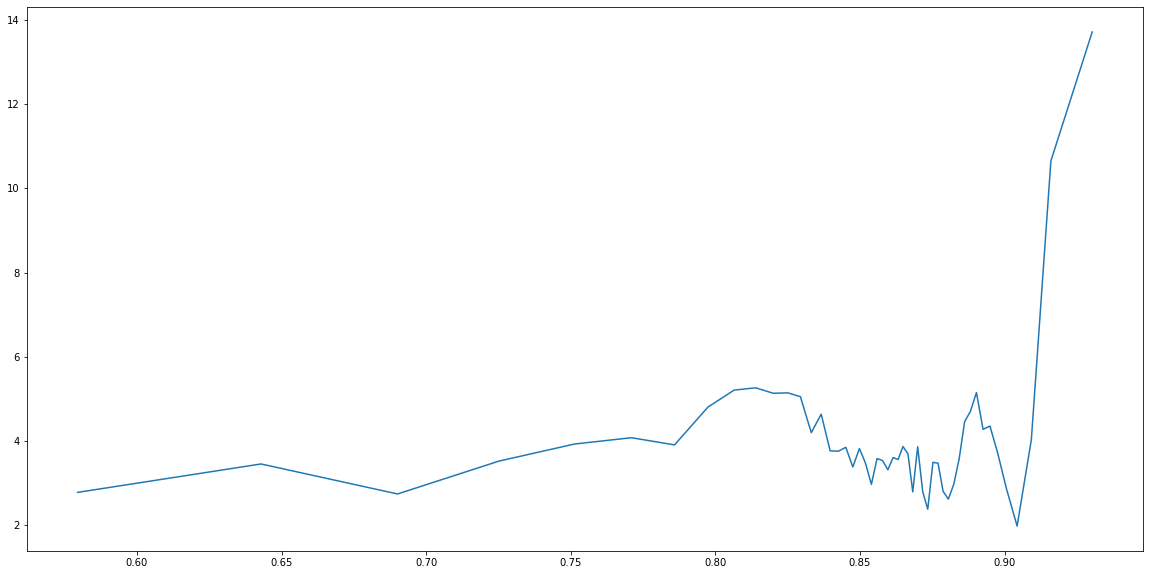

In [177]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean(all_returns_binary_thresh[splitted_binary[i]]) for i in range(num)], [np.mean(all_returns_binary[splitted_binary[i]]) for i in range(num)])
#plt.plot([np.mean(all_returns_reg_thresh[splitted_reg[i]]) for i in range(num)], [np.mean(all_returns_reg[splitted_reg[i]]) for i in range(num)])

In [179]:
results_binary[0][0][2]

array(['Cash & Cash Equivalents_YC',
       'Share Capital & Additional Paid-In Capital', 'BOL_indicator_10',
       'Price to Earnings Ratio (quarterly)_YC', 'WillR_80', 'Market-Cap',
       'close_320/Close_360', 'Payables & Accruals/Cost of Revenue_QC',
       'close_10/Close_20', 'Total Equity_QC', 'ABAND_indicator_160',
       'close_80/Close_320', 'MFI_160', 'Total Liabilities_QC',
       'Property, Plant & Equipment, Net', 'close_10/Close_240', 'RSI_7',
       'ABAND_signal_160', 'Close', 'Revenue'], dtype='<U62')

In [235]:
col_size_dict_binary = {}
col_size_dict_reg = {}

portfolio_indx = 2
boosting_round_start = 50

for i in range(len(results_binary)):
    
    
    for j in range(20):
        
        #if j == 8:
        #    continue
        
        thing_to_append = np.mean(np.array(results_binary[i][j][3])[boosting_round_start:,portfolio_indx])
        length = len(results_binary[i][j][2])
        
        try:

            col_size_dict_binary[length].append(thing_to_append)
        except:
            col_size_dict_binary[length] = [thing_to_append]
            
            
        thing_to_append = np.mean(np.array(results_reg[i][j][3])[boosting_round_start:,portfolio_indx])
        length = len(results_reg[i][j][2])
        
        try:

            col_size_dict_reg[length].append(thing_to_append)
        except:
            col_size_dict_reg[length] = [thing_to_append]
            

In [236]:
col_size_dict_binary_results = {}
for key, data in col_size_dict_binary.items():
    col_size_dict_binary_results[key] = [np.mean(data), np.std(data), len(data)]
    
col_size_dict_reg_results = {}
for key, data in col_size_dict_reg.items():
    col_size_dict_reg_results[key] = [np.mean(data), np.std(data), len(data)]

In [224]:
range_std = (np.max(np.array(list(dict_name.values()))[:,1][indx]) - np.min(np.array(list(dict_name.values()))[:,1][indx]))

range_data = (np.max(np.array(list(dict_name.values()))[:,0][indx]) - np.min(np.array(list(dict_name.values()))[:,0][indx]))

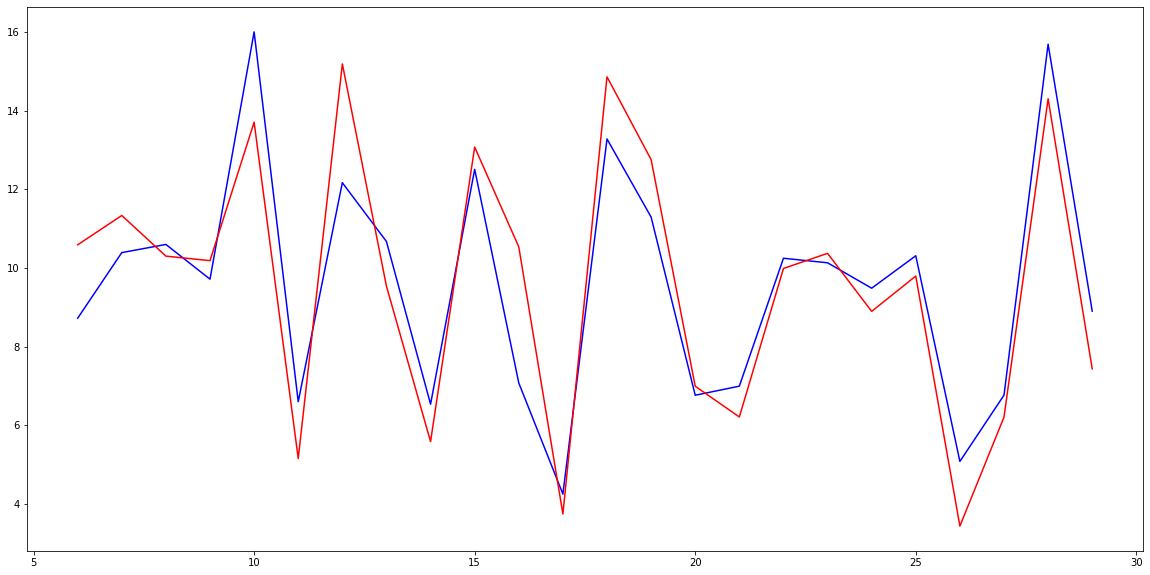

In [239]:
plt.figure(figsize = (20, 10))

dict_name = col_size_dict_binary_results
indx = np.argsort(list(dict_name.keys()))
plt.plot(np.array(list(dict_name.keys()))[indx], np.array(list(dict_name.values()))[:,0][indx], "b")
range_std = (np.max(np.array(list(dict_name.values()))[:,1][indx]) - np.min(np.array(list(dict_name.values()))[:,1][indx]))

range_data = (np.max(np.array(list(dict_name.values()))[:,0][indx]) - np.min(np.array(list(dict_name.values()))[:,0][indx]))

mean_std = np.mean(np.array(list(dict_name.values()))[:,1][indx] * (range_data / range_std))

mean_data = np.mean(np.array(list(dict_name.values()))[:,0][indx])



plt.plot(np.array(list(dict_name.keys()))[indx], np.array(list(dict_name.values()))[:,1][indx] * (range_data / range_std) - (mean_std - mean_data), "r")


In [ ]:
"""
we want to find cols that are and arent correlated (importantly not negative corr) with the spy500,

"""

In [476]:
all_mean_binary = np.array([])
all_mean_reg = np.array([])

portfolio_indx = 2

for i in range(len(results_binary)):
    for pred_indx in range(20):
        
        if pred_indx == 8:
            continue
        
        all_mean_binary = np.append(all_mean_binary, np.mean(np.array(results_binary[i][pred_indx][3])[50:,portfolio_indx]))
        all_mean_reg = np.append(all_mean_reg, np.mean(np.array(results_reg[i][pred_indx][3])[50:,portfolio_indx]))
        

In [477]:
all_mean_binary = np.reshape(all_mean_binary, (-1, 19))
all_mean_reg = np.reshape(all_mean_reg, (-1, 19))

In [478]:
sp500_return_without_8 = np.append(sp500_return[:8], sp500_return[9:])

In [479]:
np.shape(all_mean_binary)

(190, 19)

In [480]:
corr_binary = np.array([])
corr_reg = np.array([])
for i in range(len(all_mean_binary)):
        
        corr_binary = np.append(corr_binary, np.corrcoef(all_mean_binary[i], sp500_return_without_8)[0][1])
        corr_reg = np.append(corr_reg, np.corrcoef(all_mean_reg[i], sp500_return_without_8)[0][1])

In [372]:
where_not_corr_binary = np.where((corr_binary > -0.2) & (corr_binary < 0.2))[0]

In [452]:
where_not_corr_reg = np.where((corr_reg > -0.2) & (corr_reg < 0.2))[0]

In [398]:
where_lowest_corr_binary = np.argsort(corr_binary)[:30]

In [456]:
where_lowest_corr_reg = np.argsort(corr_reg)[:30]

In [421]:
where_highest_corr_binary = np.argsort(corr_binary)[::-1][:30]

In [460]:
where_highest_corr_reg = np.argsort(corr_reg)[::-1][:30]

In [369]:
indx_where_not_corr_binary_highest_return = where_not_corr_binary[np.argsort(np.mean(all_mean_binary[where_not_corr_binary], 1))[::-1][:10]]

In [453]:
indx_where_not_corr_reg_highest_return = where_not_corr_reg[np.argsort(np.mean(all_mean_reg[where_not_corr_reg], 1))[::-1][:10]]

In [437]:
indx_where_lowest_corr_binary_highest_return = where_lowest_corr_binary[np.argsort(np.mean(all_mean_binary[where_lowest_corr_binary], 1))[::-1][:10]]

In [457]:
indx_where_lowest_corr_reg_highest_return = where_lowest_corr_reg[np.argsort(np.mean(all_mean_reg[where_lowest_corr_reg], 1))[::-1][:10]]

In [422]:
indx_where_highest_corr_binary_highest_return = where_highest_corr_binary[np.argsort(np.mean(all_mean_binary[where_highest_corr_binary], 1))[::-1][:10]]

In [461]:
indx_where_highest_corr_reg_highest_return = where_highest_corr_reg[np.argsort(np.mean(all_mean_reg[where_highest_corr_reg], 1))[::-1][:10]]

In [481]:
indx_where_highest_return_binary = np.argsort(np.mean(all_mean_binary,axis = 1))[::-1][:10]

In [482]:
indx_where_highest_return_reg = np.argsort(np.mean(all_mean_reg,axis = 1))[::-1][:10]

In [483]:
indx_where_highest_corr_reg_highest_return

array([158,  78,  64,  70,  39, 137, 120,  37, 127,  31], dtype=int64)

In [424]:
np.mean(np.sort(np.mean(all_mean_binary[where_highest_corr_binary], 1))[::-1][:10])

6.281998043148734

In [391]:
indx_where_not_corr_binary_highest_return

array([], dtype=int64)

In [359]:
np.mean(np.sort(np.mean(all_mean_binary[where_not_corr_binary], 1))[::-1][:10])

4.896831061926086

In [486]:
indx = indx_where_highest_return_binary
cols = [results_reg[i][0][2] for i in indx]
unique_cols = np.array([])
for i in cols:
    unique_cols = np.append(unique_cols, i)
    
print(len(unique_cols))
unique_cols = np.unique(unique_cols)
print(len(unique_cols))

187
67


In [487]:
with open("ColSearch2/where_highest_return_binary_cols_100", "wb") as f:
    pickle.dump(cols, f)

In [362]:
cols_100 = cols.copy()
unique_cols_100 = unique_cols.copy()

In [349]:
cols_20 = cols.copy()
unique_cols_20 = unique_cols.copy()

In [330]:
cols_20 = cols.copy()

In [334]:
unique_cols_100 = unique_cols.copy()

In [375]:
len(np.intersect1d(unique_cols_20, unique_cols_100))

66

In [376]:
len(unique_cols_100)

70

In [335]:
cols = cols_20.copy()

In [303]:
indx_where_not_corr_binary_highest_return

array([103,  22,  37, 188,  92,  40,  97,  15,   7, 158], dtype=int64)

In [304]:
thing2 = []
for i in indx_where_not_corr_binary_highest_return:
    for j in range(20):
        if j == 8:
            continue
            
        thing2.append(np.mean(np.array(results_binary[i][j][3])[50:,4]))

In [317]:
thing = []
for indx, i in enumerate(results[0]):
    if indx == 8:
        continue
    
    thing.append(np.mean(np.array(i[0][3])[160:,2]))

In [315]:
len(thing)

19

In [308]:
np.shape(results_binary[0])

C:\Users\Chirag\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(20, 7)

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(np.reshape(thing2, (-1, 19)), axis = 0))
plt.plot(thing, "green")
plt.plot(sp500_return_without_8, "black")

In [281]:
unique_cols

array(['ABAND_indicator_160', 'ABAND_signal_160', 'ADX_4_23', 'APO_10_20',
       'APO_10_40', 'ATR_160', 'BOL_indicator_10', 'CMO_10',
       'Cash & Cash Equivalents',
       'Cash & Cash Equivalents/Total Liabilities_QC',
       'Cash & Cash Equivalents_YC',
       'Cash from (Repayment of) Debt/Total Liabilities',
       'Cash from (Repayment of) Debt/Total Liabilities_QC', 'Close',
       'DEMA_20', 'Enterprise Value', 'MFI_160', 'Market-Cap',
       'Net Cash from Operating Activities/Cash & Cash Equivalents_YC',
       'Net Income', 'Net Income/Enterprise Value', 'Net Profit Margin',
       'Net Profit Margin_YC', 'OBV_40',
       'Payables & Accruals/Cost of Revenue_QC',
       'Price to Earnings Ratio (quarterly)',
       'Price to Earnings Ratio (quarterly)_YC',
       'Price to Sales Ratio (quarterly)',
       'Price to Sales Ratio (quarterly)_QC',
       'Property, Plant & Equipment, Net', 'RSI_28', 'RSI_7',
       'Retained Earnings/Total Liabilities',
       'Retained Ear

In [458]:
all_mean_low = []
for i in all_mean:
    all_mean_low.append(np.mean(np.sort(i)[:14]))

In [459]:
np.shape(all_mean_low)

(190,)

In [444]:
np.argsort(np.mean(all_mean, axis = 1)[np.where((corr > -0.2) & (corr < 0.2))[0]])[::-1]

array([ 8,  2, 13,  6,  1,  7,  3,  0, 11,  9,  4, 10, 12,  5],
      dtype=int64)

In [448]:
np.where((corr > -0.2) & (corr < 0.2))[0]

array([  7,  15,  22,  40,  49,  80,  92,  97, 103, 135, 145, 158, 174,
       188], dtype=int64)

In [452]:
np.argsort(np.array(all_mean_low)[np.where((corr > -0.2) & (corr < 0.2))[0]])[-7:]

array([12,  9,  4,  0, 13,  6,  1,  8,  3,  2], dtype=int64)

In [460]:
np.sort(np.array(all_mean_low)[np.where((corr > -0.2) & (corr < 0.2))[0]])

array([-14.527288  , -12.13641226, -11.42540163, -11.41884108,
       -10.38682344,  -9.4711065 ,  -9.45686125,  -8.41981178,
        -7.10982433,  -5.48311224,  -3.77675395,  -2.56921281,
        -2.35108231,  -0.66248794])

In [461]:
indx = np.where((corr > -0.2) & (corr < 0.2))[0][np.argsort(np.array(all_mean_low)[np.where((corr > -0.2) & (corr < 0.2))[0]])[-7:]]

In [469]:
indx[0]

7

In [471]:
[results_parsed_2[j][0][2] for j in indx]

[array(['Net Income/Enterprise Value',
        'Total Assets/Share Capital & Additional Paid-In Capital_QC',
        'volatility_120', 'DEMA_20', 'APO_10_40', 'RSI_28',
        'Share Capital & Additional Paid-In Capital', 'APO_10_20',
        'close_0/Close_70', 'Revenue',
        'Payables & Accruals/Cost of Revenue_QC', 'close_20/Close_120',
        'WillR_80', 'Total Equity_QC', 'close_0/Close_240',
        'Net Cash from Operating Activities/Cash & Cash Equivalents_YC',
        'Total Liabilities', 'ATR_160', 'Net Income', 'volatility_160'],
       dtype='<U62'),
 array(['Price to Sales Ratio (quarterly)_QC', 'CMO_10', 'volatility_10',
        'WillR_80', 'close_320/Close_360', 'close_80/Close_320',
        'Total Liabilities_QC', 'Cash & Cash Equivalents',
        'Net Profit Margin', 'close_80/Close_160', 'volatility_360',
        'RSI_28', 'Cash & Cash Equivalents/Total Liabilities_QC',
        'close_0/Close_360', 'Enterprise Value', 'Total Equity_QC',
        'OBV_40', 'Reven

In [ ]:
results_dict_55 = {}
dataset = results_parsed_2.copy()
for i in indx:
    for pred_date in range(19):
        
        if pred_date != 8:

            thing_to_append = np.mean(np.array(dataset[i][pred_date][3])[55:,4])
    

In [340]:
results_dict_0 = {}
results_dict_20 = {}
results_dict_mean = {}
results_dict_growth = {}

dataset = results_reg.copy()
portfolio_indx = 4

for i in range(len(results)):
    for col_indx in range(1, 5):
        
        thing_to_append = dataset[i][col_indx][3][0][portfolio_indx]
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_0[col_name].append(thing_to_append)
                
            except:
                results_dict_0[col_name] = [thing_to_append]
        
        thing_to_append = dataset[i][col_indx][3][-1][portfolio_indx]
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_20[col_name].append(thing_to_append)
                
            except:
                results_dict_20[col_name] = [thing_to_append]
                
                
        thing_to_append = np.mean(np.array(dataset[i][col_indx][3])[:,portfolio_indx])
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_mean[col_name].append(thing_to_append)
                
            except:
                results_dict_mean[col_name] = [thing_to_append]
                
                
        temp = np.array(dataset[i][col_indx][3])[:,portfolio_indx]
                     
        thing_to_append = np.mean([temp[i] - temp[i-1] for i in range(1, len(temp))])
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_growth[col_name].append(thing_to_append)
                
            except:
                results_dict_growth[col_name] = [thing_to_append]
        
       

In [341]:
results_dict_0_data = {}
results_dict_20_data = {}
results_dict_mean_data = {}
results_dict_growth_data = {}


for col_name, data in results_dict_0.items():
    results_dict_0_data[col_name] = [np.mean(data), np.std(data), len(data)]

for col_name, data in results_dict_20.items():
    results_dict_20_data[col_name] = [np.mean(data), np.std(data), len(data)]
    

for col_name, data in results_dict_mean.items():
    results_dict_mean_data[col_name] = [np.mean(data), np.std(data), len(data)]
    
for col_name, data in results_dict_growth.items():
    results_dict_growth_data[col_name] = [np.mean(data), np.std(data), len(data)]


In [463]:
to_plot = np.mean(np.reshape([np.mean(np.array(results_parsed_2[j][i][3])[10:20,4]) for j in indx for i in range(20) if i != 8], (-1, 19)), axis = 0)

In [ ]:
plt.figure(figsize = (20, 10))
#plt.plot([np.mean(np.array(results_parsed_2[112][i][3])[10:20,4]) for i in range(20) if i != 8])
plt.plot(to_plot)
plt.plot(sp500_return_without_8)

In [364]:
all_returns_without_8_reg = []

for i in range(len(results_parsed_2_reg)):
    for pred_date in range(20):
        if pred_date != 8:
            
            all_returns_without_8_reg.append(np.array(results_parsed_2_reg[i][pred_date][3])[:,0])


In [365]:
all_returns_without_8 = []

for i in range(len(results_parsed_2)):
    for pred_date in range(20):
        if pred_date != 8:
            
            all_returns_without_8.append(np.array(results_parsed_2[i][pred_date][3])[:,0])

In [352]:
np.shape(all_returns_without_8)

(3610, 60)

In [360]:
results_parsed_2_reg = results_parsed_2.copy()

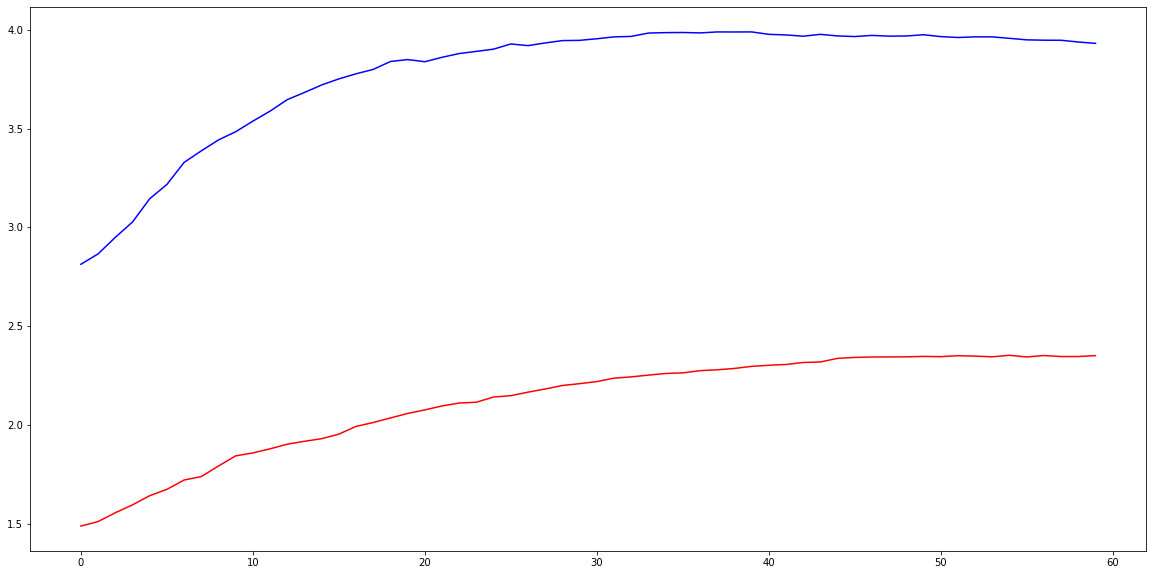

In [366]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(all_returns_without_8, axis = 0), "b")
plt.plot(np.mean(all_returns_without_8_reg, axis = 0), "r")

In [387]:
results_return = []
results_threshold = []
dataset = results_parsed_2.copy()
            
            
for j in range(len(dataset)):
    for pred_indx in range(20):
        if pred_indx != 8:
            

            results_return.append(np.array(dataset[j][pred_indx][3])[:,0])
            results_threshold.append(np.array(dataset[j][pred_indx][3])[:,1])

In [388]:
results_return = np.reshape(results_return, (-1))

In [389]:
results_threshold = np.reshape(results_threshold, (-1))

In [390]:
for num in range(50, 250):
    try:
        splitted = np.split(np.argsort(results_threshold), num)
        print(num)
        break
        
    except:
        continue

50


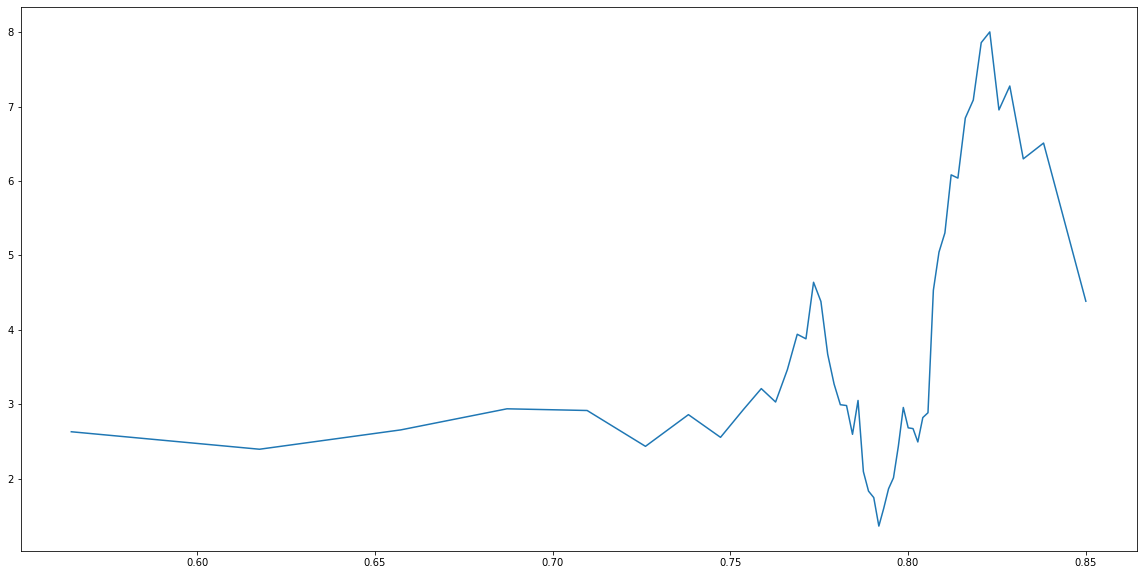

In [391]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean(results_threshold[splitted[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)])